## Introduction

This project is from Kaggle, and the goal of this project is to analyze the social media platform's (Facebook in this case) sales conversion.

### Data sources
* The data in this project is from an anonymous organization's social media ad campaign. The file is in csv form and contains 1143 observations in 11 variables. Below are the descriptions of the variables.
1. `ad_id`: an unique ID for each ad
2. `xyzcampaignid`: an ID associated with each ad campaign of XYZ company
3. `fbcampaignid`: an ID associated with how Facebook (FB) tracks each campaign
4. `age`: age of the person to whom the ad is shown
5. `gender`: gender of the person to whom the ad is shown 
6. `interest`: a code specifying the category to which the person's interest belongs (interests are as mentioned in the person's FB public profile)
7. `impressions`: the number of times the ad was shown
8. `clicks`: number of clicks on for that ad
9. `spent`: amount paid by company xyz to FB to show that ad
10. `total conversion`: total number of people who inquired about the product after seeing the ad
11. `approved conversion`: total number of people who bought the product after seeing the ad  


### Loading the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'AppleGothic'

In [2]:
df = pd.read_csv("./KAG_conversion_data.csv")
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [3]:
# Checking to see if there are any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


There is no null value in this dataset!

### Analysis using EDA (Exploratory Data Analysis)

In [4]:
df.shape

(1143, 11)

There are 1,143 rows and 11 columns. 

In [5]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


Let's look at the mean value of some of the variables.
* Impression has the average of 186,732.10
* Click has the average of 33.39
* Spent has the average of $51.36
* Total conversion has the average of 2.86
* Approved conversion has the average of 0.94


### Correlation Analysis using the correlation matrix

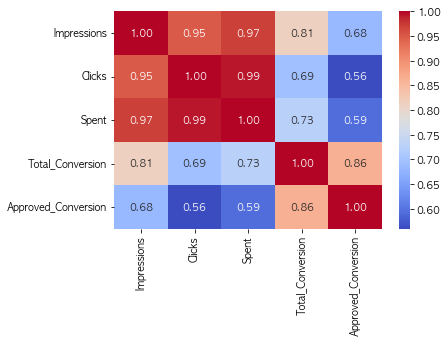

In [6]:
g = sns.heatmap(df[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion"]].corr(),
              annot = True,
              fmt = ".2f",
              cmap = "coolwarm")

As we can see from the correlation matrix, the approved conversion has the most correlation with the total conversion, which makes sense, as people who inquire the product will have higher chance to purchase the product. The total conversion and impression have more correlation with the approved conversion than clicks and spent. 

### Analyzing the association between each variable and the approved conversion

Let's use regplot for this analysis.

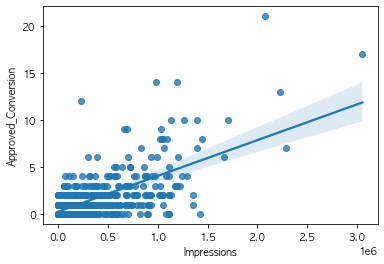

In [8]:
# Between Impressions and the Approved Conversion
sns.regplot(data=df, x="Impressions", y="Approved_Conversion");

Even though most of the approved conversion is located on the bottom left corner, the approved conversion spikes up after a certain point in impressions.

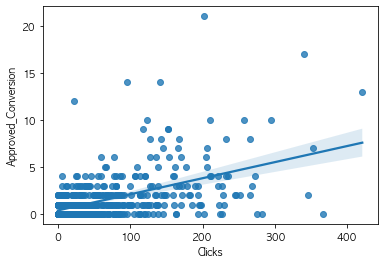

In [9]:
# Between Clicks and the Approved Conversion
sns.regplot(data=df, x="Clicks", y="Approved_Conversion");

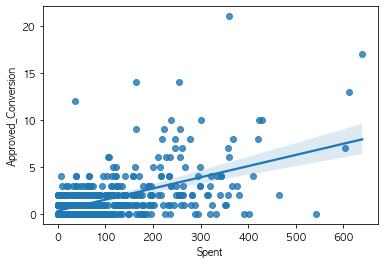

In [10]:
# Between Spent and the Approved Conversion
sns.regplot(data=df, x="Spent", y="Approved_Conversion");

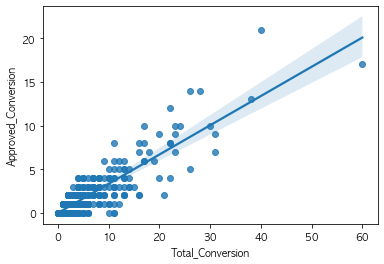

In [11]:
# Between Total Conversion and the Approved Conversion
sns.regplot(data=df, x="Total_Conversion", y="Approved_Conversion");